In [21]:
import pandas as pd
import os
from datetime import datetime as dt
import numpy as np

In [24]:
path = "./data"
cols = ['started_at', 'start_station_id', 'ended_at', 'end_station_id', 'duration']

def file_concatinator(path):
    files = [file for file in os.listdir(path) if not (file.startswith('.') or file.startswith('w') or file.startswith('e'))] # Ignore hidden file
    df = pd.DataFrame()
    for file in files:
        current_data = pd.read_csv(path+"/"+file)
        df = pd.concat([df, current_data])
        #df2 = pd.concat([df, current_data[['started_at', 'start_station_id', ]]])
               
    return df

#df = pd.read_csv('./data/20-02.csv', usecols = ['started_at', 'start_station_id', 'ended_at', 'end_station_id'])
df = file_concatinator(path)
# save the data as csv file
df.to_csv('sykkle_data.csv')

# Q1: What is the average ride looks like?

In [25]:
# read the data again 
df = pd.read_csv('sykkle_data.csv')
df.head()

,Unnamed: 0,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,0,2020-08-01 00:04:12.542000+00:00,2020-08-01 00:08:33.462000+00:00,260,423,Schous plass,nærmest rundkjøringen,59.920335,10.760804,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330
1,1,2020-08-01 01:54:23.528000+00:00,2020-08-01 02:01:20.350000+00:00,416,412,Jakob kirke,langs Torggata,59.917866,10.754898,503,Fagerheimgata,ved Dælenenga busstopp,59.927606,10.765985
2,2,2020-08-01 03:00:08.082000+00:00,2020-08-01 03:10:36.755000+00:00,628,407,Sagene bussholdeplass,langs Kierschovs gate,59.937743,10.751648,599,Paléhaven,langs Strandgata,59.910331,10.750110
3,3,2020-08-01 03:00:19.792000+00:00,2020-08-01 03:05:55.369000+00:00,335,579,Bogstadveien,ved Sporveisgata,59.924732,10.724628,623,7 Juni Plassen,langs Henrik Ibsens gate,59.915060,10.731272
4,4,2020-08-01 03:00:40.721000+00:00,2020-08-01 03:13:23.463000+00:00,762,525,Myraløkka Øst,ved Bentsenbrua,59.937205,10.760581,585,Nordre gate,ved Grünerbrua,59.921150,10.754714


In [5]:
# Task 1: The number of rides in each month
df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(pd.to_datetime)
df = df[df['started_at'] <= '2022-03-01 00:00:00']
df['month'] = df['started_at'].dt.month
df_m = df.groupby('month')['duration'].count().to_frame('tot_duration').reset_index().sort_values('month')
#df_m['tot_duration']= df_m['tot_duration']/3600
 
# Task 2: The number of rides per each year
df['year'] = df['started_at'].dt.year
df_year = df.groupby('year')['duration'].count().to_frame('tot_duration').reset_index().sort_values('year')
#df_year['tot_duration'] = df_year['tot_duration']/3600
#df_year

# Task 3: the number of trips in each month per year
df['year_day'] = df['started_at'].dt.to_period('D')

df['year_month'] = df['started_at'].dt.to_period('M')
df_ym = df.groupby(['year_day','year_month'])['duration'].count().to_frame('tot_duration').reset_index().sort_values('tot_duration', ascending = True)
df_ym = df_ym.groupby('year_month')['tot_duration'].mean().reset_index()

# Task 4: The number of trips per each hour
df['hour'] = df['started_at'].dt.hour
df_hour = df.groupby('hour')['duration'].count().to_frame('tot_trip').reset_index().sort_values('hour')

df['year_hour'] = df['started_at'].dt.to_period('H')

/home/abay/py_36_env/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [5]:
df_ym.head()

,year_month,tot_duration
0,2019-04,8768.172414
1,2019-05,10560.161290
2,2019-06,11078.233333
3,2019-07,10438.064516
4,2019-08,12883.096774


In [68]:
# Task 4: calculate the total trips for days
days_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df['day'] = df['started_at'].dt.day_name()
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

df_week = df.groupby(['day', 'year_day'])['duration'].count().to_frame('n_trips').reset_index()
df_week = df_week[df_week['n_trips'] > 0]
df_week = df_week.groupby('day')['n_trips'].mean().to_frame('tot_duration').reset_index()
 
#days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
#df_week["day"] = pd.Categorical(df_week.day, categories=days, ordered=True)

df_week.tail(20)

,day,tot_duration
0,Sunday,3545.123188
1,Monday,5956.204380
2,Tuesday,6307.913043
3,Wednesday,6418.340580
4,Thursday,6348.579710
5,Friday,6019.514493
6,Saturday,4530.789855


In [7]:
df_pre = pd.read_csv('table.csv', sep=';', header=None)

df_pre.shape

(25562, 4)

# Weather data ana

In [29]:
# Import data set and some pre-processing 
#-BEGIN HEADER-
#NASA/POWER CERES/MERRA2 Native Resolution Hourly Data 
#Dates (month/day/year): 01/04/2019 through 03/10/2022 
#Location: Latitude  59.9132   Longitude 10.7488 
#Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 258.74 meters
#The value for missing source data that cannot be computed or is outside of the sources #availability range: -999 
#Parameter(s): 
#T2M             MERRA-2 Temperature at 2 Meters (C) 
#T2MWET          MERRA-2 Wet Bulb Temperature at 2 Meters (C) 
#QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 
#PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/hour) 
#WS10M           MERRA-2 Wind Speed at 10 Meters (m/s) 
#-END HEADER-

import pandas as pd
w_df = pd.read_csv('./data/weather_hour_2019.csv')
w_df.rename(columns={'YEAR':'Year', 'MO':'Month', 'DY':'Day', 'HR':'Hour'}, inplace=True)
w_df['date'] = pd.to_datetime(w_df[['Year', 'Month', 'Day', 'Hour']], format = '%Y%M%D %H')
w_df.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
#
w_df = w_df[(w_df['date'] > '2019-04-01 00:00:00') & (w_df['date'] < '2022-03-01 00:00:00')]
w_df = w_df[~w_df['date'].between('2020-01-01 00:00:00', '2020-03-01 00:00:00')]

#add a rain not rain column
w_df['year_hour'] = w_df['date'].dt.to_period('H')
w_df.head()

,T2M,T2MWET,specific_humidity,precipitation,WS10M,date,year_hour
2089,-5.21,-6.09,2.26,0.0,1.92,2019-04-01 01:00:00,2019-04-01 01:00
2090,-5.42,-6.34,2.20,0.0,1.80,2019-04-01 02:00:00,2019-04-01 02:00
2091,-5.58,-6.51,2.14,0.0,1.69,2019-04-01 03:00:00,2019-04-01 03:00
2092,-5.68,-6.63,2.14,0.0,1.61,2019-04-01 04:00:00,2019-04-01 04:00
2093,-5.66,-6.67,2.08,0.0,1.65,2019-04-01 05:00:00,2019-04-01 05:00


In [7]:
# Task 1: duration of rides for each month
#w_df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(pd.to_datetime)
w_df['month'] = w_df['date'].dt.month
w_df_mT  = w_df.groupby('month')['T2M'].mean().to_frame('avg_temp').reset_index().sort_values('month')
w_df_mP  = w_df.groupby('month')['precipitation'].mean().to_frame('avg_precip').reset_index().sort_values('month')
w_df_mWS = w_df.groupby('month')['WS10M'].mean().to_frame('avg_windspeed').reset_index().sort_values('month')
w_df_mSH = w_df.groupby('month')['specific_humidity'].mean().to_frame('avg_humidity').reset_index().sort_values('month')
 
# Task 3: the duration for each month per year
w_df['year_month'], w_df['hour'] = w_df['date'].dt.to_period('M'), w_df['date'].dt.hour

w_df_ymT  = w_df.groupby('year_month')['T2M'].mean().to_frame('avg_temp').reset_index().sort_values('year_month')
w_df_ymP  = w_df.groupby('year_month')['precipitation'].mean().to_frame('avg_precip').reset_index().sort_values('year_month')
w_df_ymWS = w_df.groupby('year_month')['WS10M'].mean().to_frame('avg_windspeed').reset_index().sort_values('year_month')
#w_df_ymSH = w_df.groupby('year_month')['specific_humidity'].mean().to_frame('avg_humidity').reset_index().sort_values('year_month')

w_df_hourT  = w_df.groupby('hour')['T2M'].mean().to_frame('avg_temp').reset_index().sort_values('hour')
w_df_hourP  = w_df.groupby('hour')['precipitation'].mean().to_frame('avg_precip').reset_index().sort_values('hour')
w_df_hourWS = w_df.groupby('hour')['WS10M'].mean().to_frame('avg_windspeed').reset_index().sort_values('hour')

## Visialization for the first problem

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

'''weather_col = [w_df_mT.avg_temp, w_df_mP.avg_precip, w_df_mWS.avg_windspeed]
trip_duration = [df_m.tot_duration, df_m.tot_duration, df_m.tot_duration]
xlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
keys = [xlabel, xlabel, xlabel]
title = ['trip duration vs temprature', 'trip duration vs precipitation', 'trip duration vs wind speed']
ylabel = ['Avg_temp [oC]', 'Avg_prec [mm]', 'Avg_windspeed [m/s]']
weather_ylabel= ['Temprature', 'Precipitation', 'Wind speed']
num = [12,12,12]

sns.set_context('paper', font_scale=1.4)
f, axs = plt.subplots(ncols=3, figsize=(25,5))
def plotting_func(axs, col, twin_col, keys, title, ylabel, num,  kind):
    for i in range(3):
        ax = axs[i]
        axtwin = ax.twinx()
        ax.set_xticks(range(num[i]))
        ax.set_xticklabels(keys[i], rotation = 90, size = 12, color='b')
        if kind == 'bar':
            ax.bar(range(num[i]), col[i], width=0.8, align='center', color = 'grey')
        elif kind == 'line':
            ax.plot(range(num[i]), col[i], '-grey')

            
        #ax.set_yticklabels(col[i], rotation =0, size = 12)
        axs[0].set_ylabel('# trips', color='grey')
        #ax.set_xlabel('Months', color='b')
        ax.tick_params(axis='y', colors='grey')

        axtwin.plot(range(num[i]), twin_col[i], '-*k', linewidth=1.2)
        ax.set_title(title[i], fontsize = 12.0)
        #axt.set_xlabel(xlabel[i], fontsize = 12.0)
        axtwin.set_ylabel(ylabel[i], fontsize = 12.0) 
        f.tight_layout(pad=1.20)
#def y_fmt(tick_val, pos):
#    if tick_val > 1000000:
#        val = int(tick_val)/1000000
#        return '{:d} M'.format(val)
#    elif tick_val > 1000:
#        val = int(tick_val) / 1000
#        return '{:d} k'.format(val)
#    else:
#        return tick_val

        
plotting_func(axs, trip_duration, weather_col, keys, title, ylabel, num, 'bar')
#axis = plt.gca()
#axis.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#plt.show()
plt.savefig('/home/kassa/Desktop/DataScienceTutor/sykk/images/avg_nooftrips_permonth.eps')'''

"weather_col = [w_df_mT.avg_temp, w_df_mP.avg_precip, w_df_mWS.avg_windspeed]\ntrip_duration = [df_m.tot_duration, df_m.tot_duration, df_m.tot_duration]\nxlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']\nkeys = [xlabel, xlabel, xlabel]\ntitle = ['trip duration vs temprature', 'trip duration vs precipitation', 'trip duration vs wind speed']\nylabel = ['Avg_temp [oC]', 'Avg_prec [mm]', 'Avg_windspeed [m/s]']\nweather_ylabel= ['Temprature', 'Precipitation', 'Wind speed']\nnum = [12,12,12]\n\nsns.set_context('paper', font_scale=1.4)\nf, axs = plt.subplots(ncols=3, figsize=(25,5))\ndef plotting_func(axs, col, twin_col, keys, title, ylabel, num,  kind):\n    for i in range(3):\n        ax = axs[i]\n        axtwin = ax.twinx()\n        ax.set_xticks(range(num[i]))\n        ax.set_xticklabels(keys[i], rotation = 90, size = 12, color='b')\n        if kind == 'bar':\n            ax.bar(range(num[i]), col[i], width=0.8, align='center', color = 'grey')\n

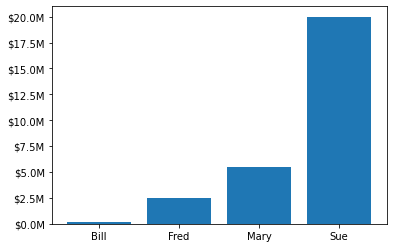

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

import matplotlib.pyplot as plt

money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    """The two arguments are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

fig, ax = plt.subplots()
# Use automatic FuncFormatter creation
ax.yaxis.set_major_formatter(millions)
ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
plt.show()


/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


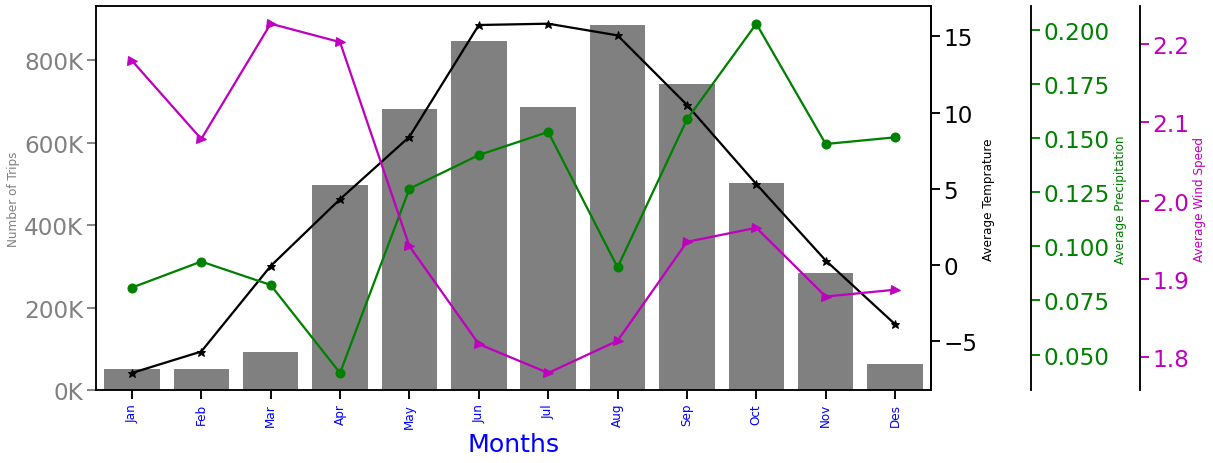

In [12]:
#plt.figure()
sns.set_context('talk', font_scale=1.4)
f, ax = plt.subplots(figsize=(18, 7))
axt   = ax.twinx()
axt1, axt2 = ax.twinx(), ax.twinx()

def millions(x, pos):
    """The two arguments are the value and tick position."""
    return '{:1.0f}K'.format(x*1e-3)

axt1.spines["right"].set_position(("axes", 1.12))
axt2.spines["right"].set_position(("axes", 1.25))

xlabel = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Des']
x      = range(1, 1+len(xlabel))

ax.bar(xlabel, df_m.tot_duration, color='grey')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Months', color='b')
ax.yaxis.set_major_formatter(millions)
ax.set_ylabel('Number of Trips', color='grey', size=12)
ax.set_xticklabels(xlabel, rotation = 90, size = 12, color='b')
#ax.locator_params(axis='x', nbins=24)
 
axt.plot(xlabel, w_df_mT.avg_temp, '-*k')
axt.tick_params(axis='y', colors='k')
axt.set_ylabel('Average Temprature', color='k', size=12)
axt.set_xticklabels(xlabel, rotation = 90, size = 12, color='b')

axt1.plot(xlabel, w_df_mP.avg_precip, '-og')
axt1.tick_params(axis='y', colors='g')
axt1.set_ylabel('Average Precipitation', color='g', size = 12)
axt1.set_xticklabels(xlabel, rotation = 90, size = 12, color='b')


axt2.plot(xlabel, w_df_mWS.avg_windspeed, '->m')
axt2.tick_params(axis='y', colors='m')
axt2.set_ylabel('Average Wind Speed', color='m', size=12)
axt2.set_xticklabels(xlabel, rotation = 90, size = 12, color='b')

ax.margins(x=0.01)
for ax in [axt, axt1, axt2]:
    ax.set_frame_on(True)
    ax.patch.set_visible(False)

    plt.setp(ax.spines.values(), visible=False)
    ax.spines["right"].set_visible(True)
f.tight_layout() 
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/Weather_vs_notrips.eps')

/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


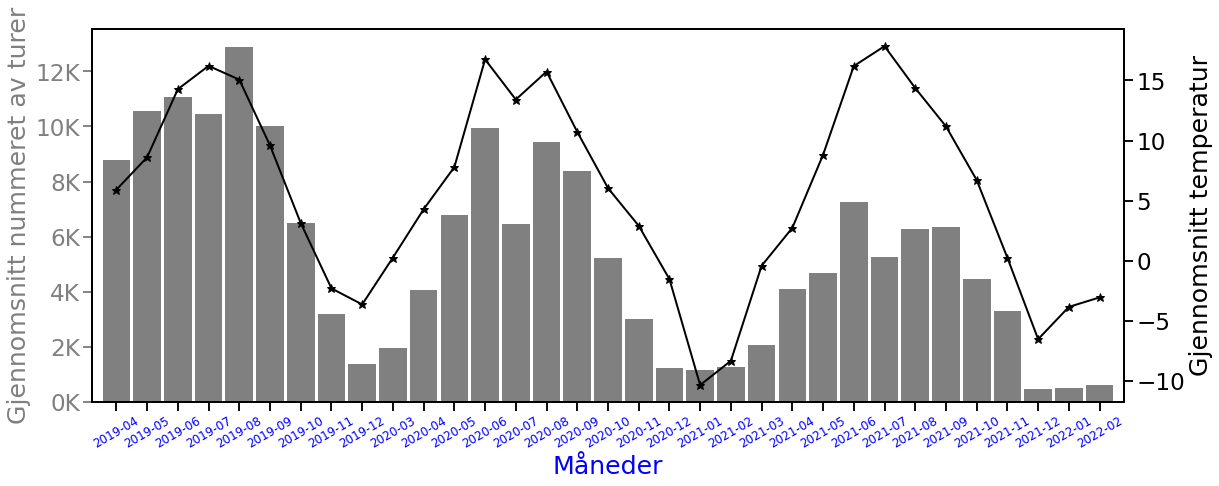

In [13]:
#axt1.spines["right"].set_position(("axes", 1.125))
#axt2.spines["right"].set_position(("axes", 1.35))

def millions(x, pos):
    """The two arguments are the value and tick position."""
    return '{:1.0f}K'.format(x*1e-3)

sns.set_context('talk', font_scale=1.4)
f, ax = plt.subplots(figsize=(17.5, 7))
axt   = ax.twinx()

x_name = ['2019-04','2019-05', '2019-06','2019-07', '2019-08', '2019-09', '2019-10','2019-11', '2019-12', '2020-03',
          '2020-04','2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10','2020-11', '2020-12', '2021-01',
          '2021-02','2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
          '2021-12', '2022-01', '2022-02']

#x_name = x_name[0:len(x_name),1]
#x = np.arange(len(x_name))
ax.bar(x_name, df_ym.tot_duration, color='grey', width = 0.9)
ax.yaxis.set_major_formatter(millions)
ax.set_xticklabels(x_name, rotation = 30, size = 12, color='b')
ax.tick_params(axis = 'y', colors='grey')
ax.set_xlabel('Måneder', color='b')
ax.set_ylabel('Gjennomsnitt nummeret av turer', color='grey')

#ax.locator_params(axis='x', nbins=48)
axt.plot(x_name, w_df_ymT.avg_temp, '-*k', linewidth=2)
axt.set_xticklabels(x_name, rotation = 45, size = 20, color='b')
axt.tick_params(axis='y', colors='k')
axt.set_ylabel('Gjennomsnitt temperatur', color='k')
ax.margins(x=0.01)
ax.set(frame_on = True)
#ax.locator_params(axis='x', nbins=10)
ax.margins(x = 0.01)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/avg_no_trips_vs_temp_per_year_month.eps')

#for ax in [axt, axt1, axt2]:
    #ax.set_frame_on(True)
    #ax.patch.set_visible(False)

    #plt.setp(ax.spines.values(), visible=False)
    #ax.spines["right"].set_visible(True)
    #ax.locator_params(axis='x', nbins=10)

 
#for i in range(3):
#    
#axs[i].legend(loc=0)


/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


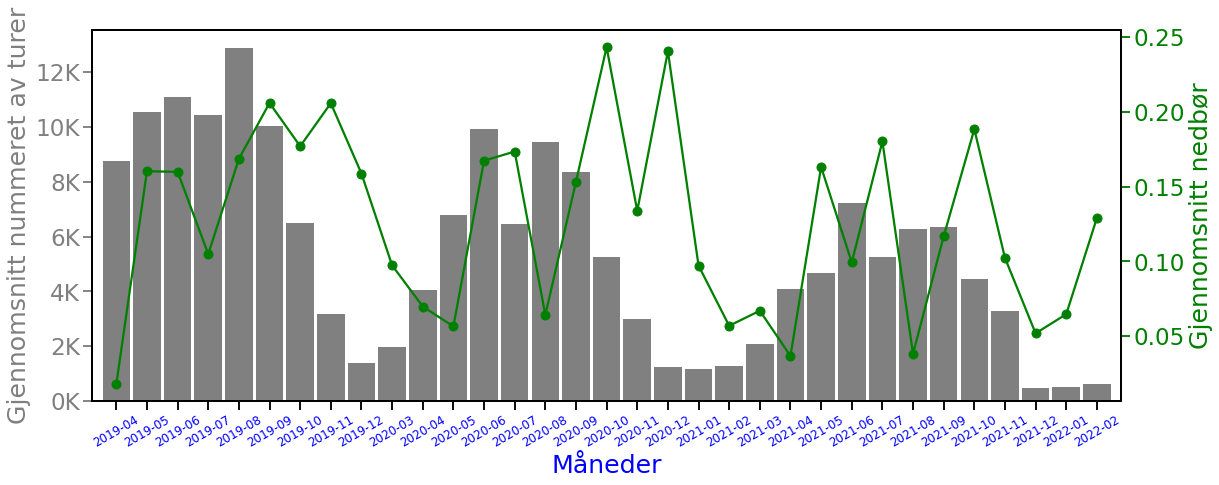

In [14]:
sns.set_context('talk', font_scale=1.4)
f, ax = plt.subplots(figsize=(17.5, 7))
axt = ax.twinx()
ax.yaxis.set_major_formatter(millions)

ax.bar(x_name, df_ym.tot_duration, color='grey', width=0.9)
ax.set_xticklabels(x_name, rotation = 30, size = 12, color='b')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Måneder', color='b')
ax.set_ylabel('Gjennomsnitt nummeret av turer',  color='grey')
 
axt.plot(x_name, w_df_ymP.avg_precip, '-og')
axt.set_xticklabels(x_name, rotation = 30, size = 12, color='b')
axt.tick_params(axis='y', colors='g')
axt.set_xticklabels(df_ym.year_month,  color='g')
axt.set_ylabel('Gjennomsnitt nedbør', color='g')
ax.margins(x = 0.01)
plt.tight_layout()

plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/avg_no_trips_vs_precip_per_year_month.eps')

/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


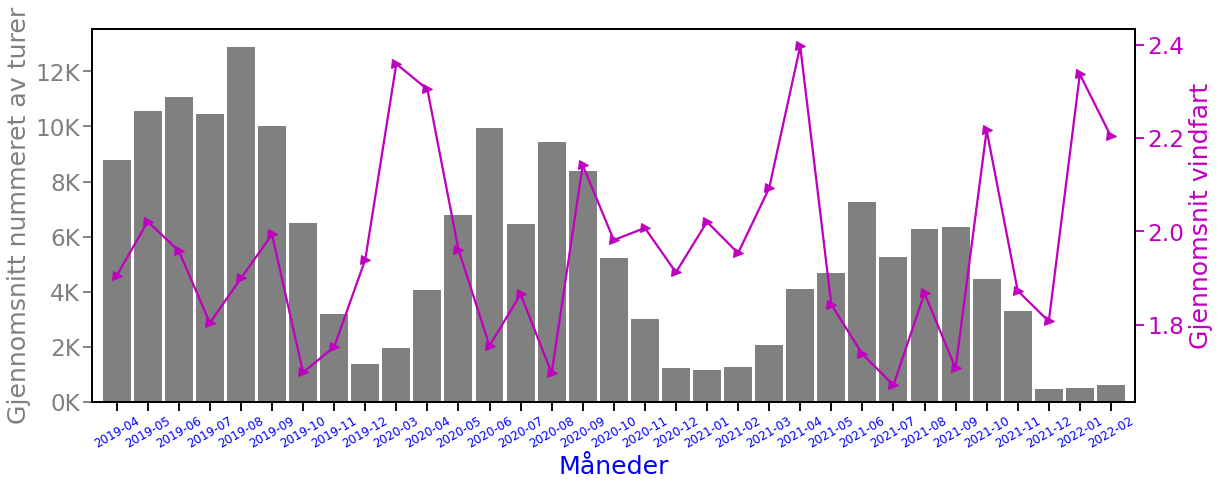

In [15]:
sns.set_context('talk', font_scale=1.4)
f, ax = plt.subplots(figsize=(17.5, 7))
axt = ax.twinx()
ax.bar(x_name, df_ym.tot_duration, color='grey', width=0.9)
ax.set_xticklabels(x_name, rotation = 30, size = 12, color='b')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Måneder', color='b')
ax.yaxis.set_major_formatter(millions)
ax.margins(x=0.01)
ax.set_ylabel('Gjennomsnitt nummeret av turer', color='grey')
 
axt.plot(x_name, w_df_ymWS.avg_windspeed, '->m')
axt.set_xticklabels(x_name, rotation = 30, size = 20, color='b')
axt.tick_params(axis='y', colors='m')
axt.set_xticklabels(df_ym.year_month, size = 12, color='m')
axt.set_ylabel('Gjennomsnit vindfart', color='m')
#axt.locator_params(axis='x', nbins=10)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/avg_no_trips_vs_windspeed_per_year_month.eps')

/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


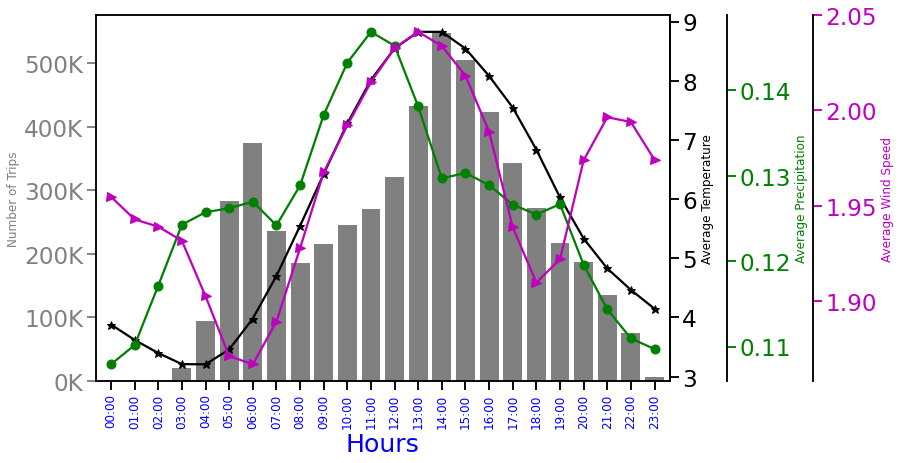

In [16]:
sns.set_context('talk', font_scale=1.4)
f, ax = plt.subplots(figsize=(14, 7))
axt = ax.twinx()
axt1, axt2 = ax.twinx(), ax.twinx()

axt1.spines["right"].set_position(("axes", 1.1))
axt2.spines["right"].set_position(("axes", 1.25))
x_tick = ['00:00','01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
    '12:00', '13:00','14:00', '15:00', '16:00', '17:00', '18:00', '19:00','20:00', '21:00', '22:00', '23:00']

ax.bar(x_tick, df_hour.tot_trip, color='grey')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Hours', color='b')
ax.yaxis.set_major_formatter(millions)
ax.set_ylabel('Number of Trips', color='grey', size=12)
ax.set_xticklabels(x_name, rotation = 90, size = 12, color='b')
#ax.locator_params(axis='x', nbins=48)

axt.plot(x_tick, w_df_hourT.avg_temp, '-*k')
axt.tick_params(axis='y', colors='k')
axt.set_xticklabels(df_hour.hour, size = 12, color='k')
axt.set_ylabel('Average Temperature', color='k', size=12)


axt1.plot(x_tick, w_df_hourP.avg_precip, '-og')
axt1.tick_params(axis='y', colors='g')
axt1.set_ylabel('Average Precipitation', color='g', size = 12)


axt2.plot(x_tick, w_df_hourWS.avg_windspeed, '->m')
axt2.tick_params(axis='y', colors='m')
axt2.set_ylabel('Average Wind Speed', color='m', size=12)
ax.margins(x=0.01)


for ax in [axt, axt1, axt2]:
    ax.set_frame_on(True)
    ax.patch.set_visible(False)

    plt.setp(ax.spines.values(), visible=False)
    ax.spines["right"].set_visible(True)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/weather_vs_notrips_per_hour.eps')

/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


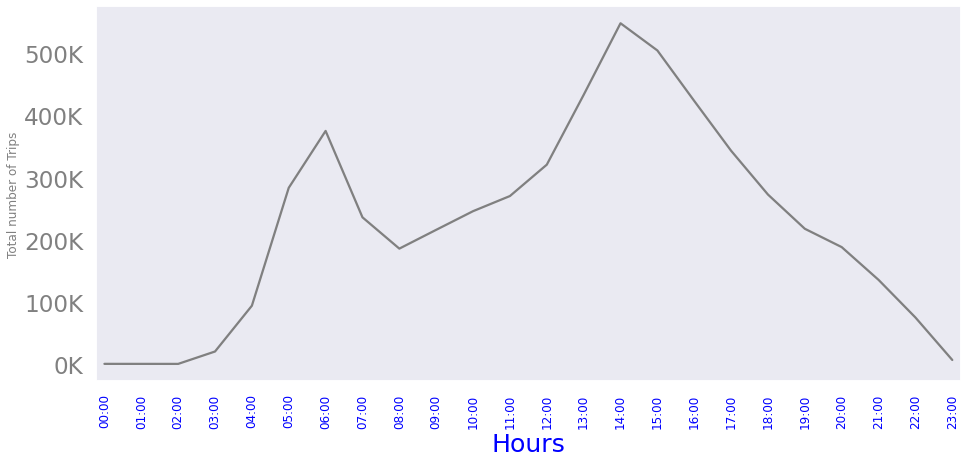

In [17]:
sns.set_context('talk', font_scale=1.4)
sns.set_style('dark')
f, ax = plt.subplots(figsize=(14, 7))

x_tick = ['00:00','01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
    '12:00', '13:00','14:00', '15:00', '16:00', '17:00', '18:00', '19:00','20:00', '21:00', '22:00', '23:00']

ax.plot(x_tick, df_hour.tot_trip, color='grey')
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Hours', color='b')
ax.yaxis.set_major_formatter(millions)
ax.set_ylabel('Total number of Trips', color='grey', size=12)
ax.set_xticklabels(x_tick, rotation = 90, size = 12, color='b')
ax.margins(x=0.01)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/weather_plot_vs_notrips_per_hour.eps')


/home/abay/py_36_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


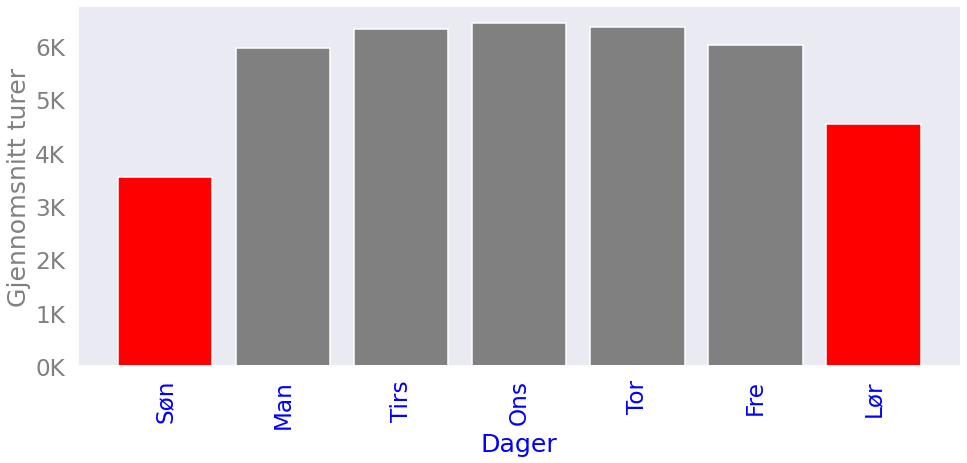

In [74]:
# Number of trips per week
sns.set_context('talk', font_scale=1.4)
f, ax = plt.subplots(figsize=(14, 7))
days = ["Søn", "Man", "Tirs", "Ons", "Tor", "Fre", "Lør"]

c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'red']
ax.bar(days, df_week.tot_duration, color=c)
ax.tick_params(axis='y', colors='grey')
ax.set_xlabel('Dager', color='b')
ax.yaxis.set_major_formatter(millions)
ax.set_ylabel('Gjennomsnitt turer', color='grey')
ax.set_xticklabels(days, rotation = 90, color='b')
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/notrips_per_week_days.eps')

# Q2: Which Station are most popular 

In [19]:
# Create a column that identifies before and after lunch

def get_time(x):
    if x < 13:
        return 'before lunch'
    else:
        return 'after lunch'

df['time'] = df['hour'].apply(get_time) #lambda x: 'before lunch' if x < 12 else 'after lunch')

pairings = list(zip(df.start_station_id, df.end_station_id))
df['pairs'] = pairings
#df['start_station_id'] = df['start_station_id'].astype('int')
df.head(2)

,Unnamed: 0,started_at,ended_at,duration,start_station_id,end_station_id,month,year,year_day,year_month,hour,year_hour,day,time,pairs
0,0,2020-08-01 00:04:12.542000+00:00,2020-08-01 00:08:33.462000+00:00,260,423,460,8,2020,2020-08-01,2020-08,0,2020-08-01 00:00,Saturday,before lunch,"(423, 460)"
1,1,2020-08-01 01:54:23.528000+00:00,2020-08-01 02:01:20.350000+00:00,416,412,503,8,2020,2020-08-01,2020-08,1,2020-08-01 01:00,Saturday,before lunch,"(412, 503)"


In [20]:
# import seaborn as sns
# sns.countplot(x='day', data=df)

In [21]:
df_bl = df[df['time'] == 'before lunch'] # get the top ten start-return trips in the morning 
df_al = df[df['time'] == 'after lunch'] # get the top ten start-return trips in the afternon 
 
df_bl = df_bl.groupby('pairs')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)
df_bl = df_bl.iloc[0:10, :]


df_al = df_al.groupby('pairs')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)


df_al = df_al.iloc[0:10, :]

# df_pair = df.groupby('pairs')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)

#df_pair = df_pair.iloc[0:10, :]
#df_pair
df_bl.head()

,pairs,n_trips
19239,"(456, 479)",2440
21152,"(464, 443)",2311
19279,"(456, 534)",2198
15498,"(440, 495)",2101
17134,"(447, 443)",1789


- Task: Number of trips initiated before and after lunch 

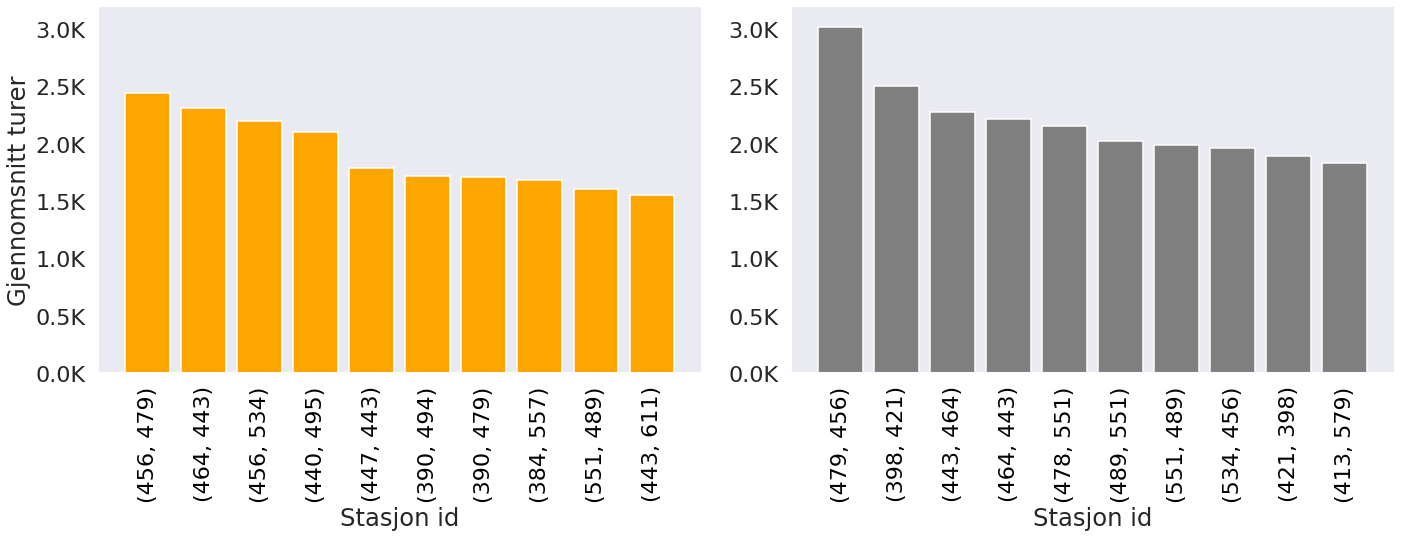

In [22]:
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return '{:1.1f}K'.format(x*1e-3)

sns.set_context('talk', font_scale=1.35)
f, ax = plt.subplots(ncols=2, figsize=(20, 8))

bl = [str(key) for key in df_bl.pairs]
ax[0].bar(range(len(bl)), df_bl.n_trips, tick_label=bl, color='orange')
ax[0].set_xticks(range(len(bl)))
ax[0].yaxis.set_major_formatter(millions)
ax[0].set_xticklabels(bl, rotation = 90,  color='k')
ax[0].set(frame_on=True)
ax[0].set_ylim(0, 3200)
ax[0].set_xlabel('Stasjon id')
ax[0].set_ylabel('Gjennomsnitt turer')

 
al = [str(key) for key in df_al.pairs]
ax[1].bar(range(len(al)), df_al.n_trips, tick_label = al, color= 'grey')
ax[1].set_xticks(range(len(al)))
ax[1].set_xticklabels(al, rotation=90, color = 'k')
ax[1].yaxis.set_major_formatter(millions)
ax[1].set(frame_on = True)
ax[1].set_ylim(0,3200)
ax[1].set_xlabel('Stasjon id')
plt.tight_layout()

#plt.xticks(rotation='vertical', size=8)
#plt.show()
f.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/top_10_pairs_of_stations.eps')

In [23]:
# Top stations in the morning and after non
after_lunch = df[df['time'] == 'after lunch']
after_lunch = after_lunch.groupby('start_station_id')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)
#top_after = after_lunch.iloc[0:10, :]
after_lunch['time'] = 'After lunch'
                                                                                   
                                                                                                                                                                  
before_lunch = df[df['time'] == 'before lunch']
before_lunch = before_lunch.groupby('start_station_id')['duration'].count().to_frame('n_trips').reset_index().sort_values('n_trips', ascending=False)
#top_before = before_lunch.iloc[0:10, :]
before_lunch['time'] = 'Before lunch'
top = pd.concat([after_lunch, before_lunch], axis = 0, ignore_index=False)    
                                                                                  
top_pivoted = pd.pivot_table(index='start_station_id', columns='time',values='n_trips', data=top).reset_index()


In [24]:
top_pivoted['total_trip'] = top_pivoted['After lunch'] + top_pivoted['Before lunch']
top_pivoted = top_pivoted.sort_values('total_trip', ascending = False)
top_station = top_pivoted.iloc[0:10, :]


bottom_station = top_pivoted.iloc[-10:]
bottom_station.head()

time,start_station_id,After lunch,Before lunch,total_trip
262,2307,1434,816,2250
112,492,1345,819,2164
263,2308,1002,456,1458
256,1919,449,787,1236
261,2306,662,328,990


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


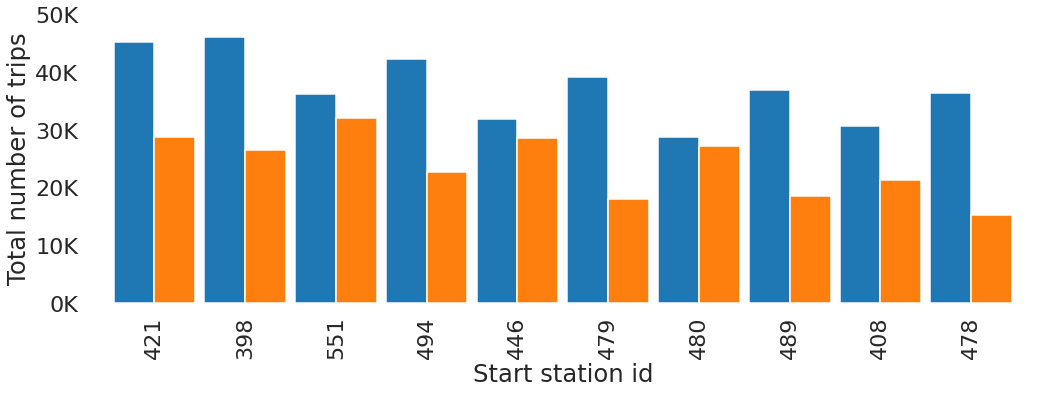

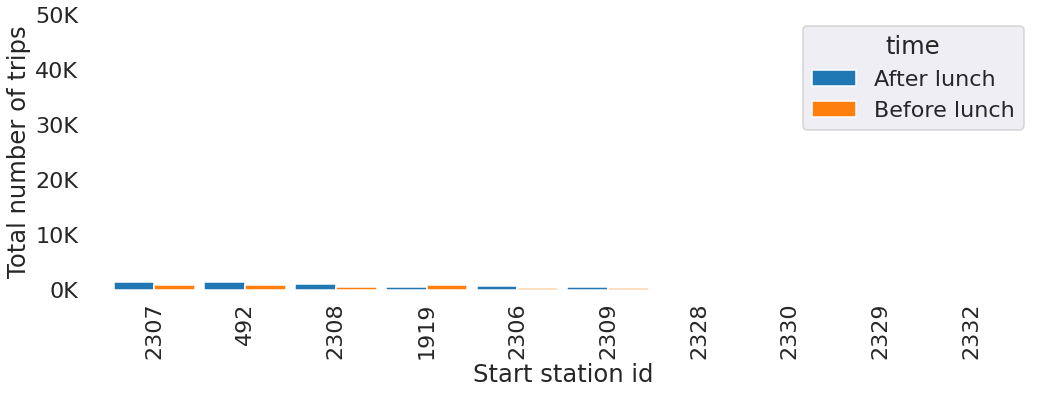

In [25]:
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return '{:1.0f}K'.format(x*1e-3)

ax=top_station.plot(x="start_station_id", y=["After lunch", "Before lunch"], kind="bar", width=0.9, figsize=(15, 6), legend=False)
ax.set_xlabel("Start station id")
ax.set_ylabel("Total number of trips")
ax.set_ylim(0,50107)
ax.yaxis.set_major_formatter(millions)
ax.set(frame_on=False)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/top_10_total_no_trips.eps')

ax=bottom_station.plot(x="start_station_id", y=["After lunch", "Before lunch"], kind="bar", width=0.9, figsize=(15, 6))
ax.set_xlabel("Start station id")
ax.set_ylabel("Total number of trips")
ax.set_ylim(0,50107)
ax.yaxis.set_major_formatter(millions)
ax.set_frame_on(False)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/bottom_10_total_no_trips.eps')


In [26]:
'''# Task 1: Top ten stations
df_startstation = df.groupby('start_station_id')['duration'].count().to_frame('n_start_trips').reset_index().sort_values('start_station_id', ascending = True)
df_endstation = df.groupby('end_station_id')['duration'].count().to_frame('n_end_trips').reset_index()
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[0].plot(df_startstation.start_station_id, df_startstation.n_start_trips)
ax[1].plot(df_endstation.end_station_id, df_endstation.n_end_trips)

sum1 = df_startstation[df['start_station_id'] <= 750].sum(axis=0)
sum2 = df_startstation[df['start_station_id'] > 750].sum(axis=0)
sum2
#df_startstation.start_station_id'''

"# Task 1: Top ten stations\ndf_startstation = df.groupby('start_station_id')['duration'].count().to_frame('n_start_trips').reset_index().sort_values('start_station_id', ascending = True)\ndf_endstation = df.groupby('end_station_id')['duration'].count().to_frame('n_end_trips').reset_index()\nf, ax = plt.subplots(ncols=2, figsize=(12, 6))\nax[0].plot(df_startstation.start_station_id, df_startstation.n_start_trips)\nax[1].plot(df_endstation.end_station_id, df_endstation.n_end_trips)\n\nsum1 = df_startstation[df['start_station_id'] <= 750].sum(axis=0)\nsum2 = df_startstation[df['start_station_id'] > 750].sum(axis=0)\nsum2\n#df_startstation.start_station_id"

In [27]:
# Two files are need, 1. ture initiating and ending

df['year_day'] = df['started_at'].dt.to_period('D')
sykkle_data = df.groupby(['year_day', 'start_station_id'])['duration'].count().to_frame('n_trips').reset_index()

station = sykkle_data.groupby('start_station_id')['n_trips'].mean().to_frame('Avg_no_trips').reset_index().sort_values('Avg_no_trips', ascending = False)
station.Avg_no_trips = station.Avg_no_trips.astype(int)

top_stations = station.iloc[0:10]
botom_station = station.iloc[-10:]
station.head()

#sykkle_data['year_day'] = sykkle_data['year_day'].dt.to_timestamp()

#merged = pd.merge(sykkle_data, w_df, left_on='year_hour', right_on = 'date', how='inner')

/home/abay/py_36_env/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,start_station_id,Avg_no_trips
114,494,82
43,421,76
20,398,76
165,551,71
68,446,64


NameError: name 'end_top_stations' is not defined

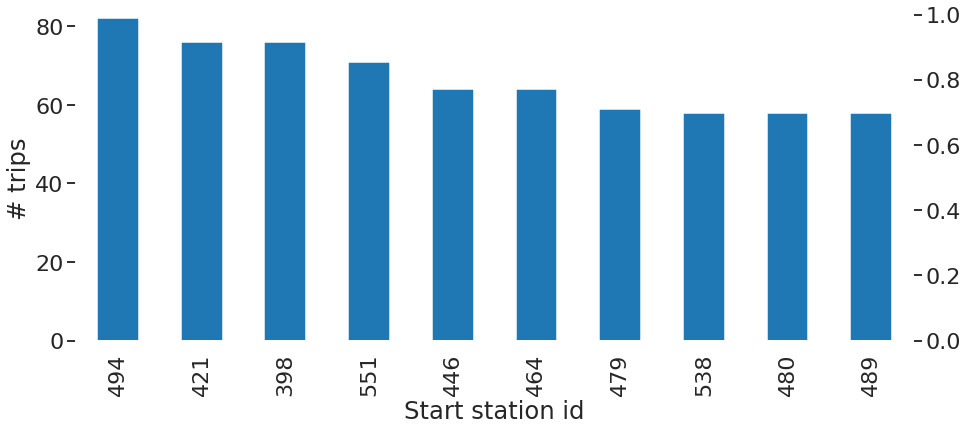

In [28]:
ax  = top_stations.plot(x="start_station_id", y='Avg_no_trips' , kind="bar", figsize=(15, 6), legend=False)
axt = ax.twinx()
ax.set_xlabel("Start station id")
ax.set_ylabel("# trips")
ax.set_ylim(0,83)
#ax.yaxis.set_major_formatter(millions)
ax.set(frame_on=False)

merged_start_end = pd.merge(top_stations, end_top_stations,left_on='start_station_id', right_on='end_station_id', how='inner' )

axt=merged_start_end.plot(x="end_station_id", y=['Avg_no_trips','Avg_no_trips_end'] , kind="bar", figsize=(15, 6))
axt.set_xlabel("Return station id")
axt.set_ylabel("# trips")
axt.set_ylim(0,131)
#ax.yaxis.set_major_formatter(millions)
axt.set(frame_on=False)
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/avg_top_10_no_trips.eps')

ax=botom_station.plot(x="start_station_id", y=["Avg_no_trips"], kind="bar", figsize=(15, 6), legend=False)
ax.set_xlabel("Start station id")
ax.set_ylabel("# trips")
ax.set_ylim(0,83)
#ax.yaxis.set_major_formatter(millions)
ax.set_frame_on(False)
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/avg_bottom_10_no_trips.eps')


In [29]:
df['year_day_end'] = df['ended_at'].dt.to_period('D')
end_sykkle_data = df.groupby(['year_day_end', 'end_station_id'])['duration'].count().to_frame('n_trips_end').reset_index()

end_station = end_sykkle_data.groupby('end_station_id')['n_trips_end'].mean().to_frame('Avg_no_trips_end').reset_index().sort_values('Avg_no_trips_end', ascending = False)
end_station.Avg_no_trips_end = end_station.Avg_no_trips_end.astype(int)

end_top_stations = end_station.iloc[0:10]
end_botom_station = end_station.iloc[-10:]
end_station.head()

/home/abay/py_36_env/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,end_station_id,Avg_no_trips_end
114,494,130
110,489,90
165,551,81
86,464,76
20,398,75


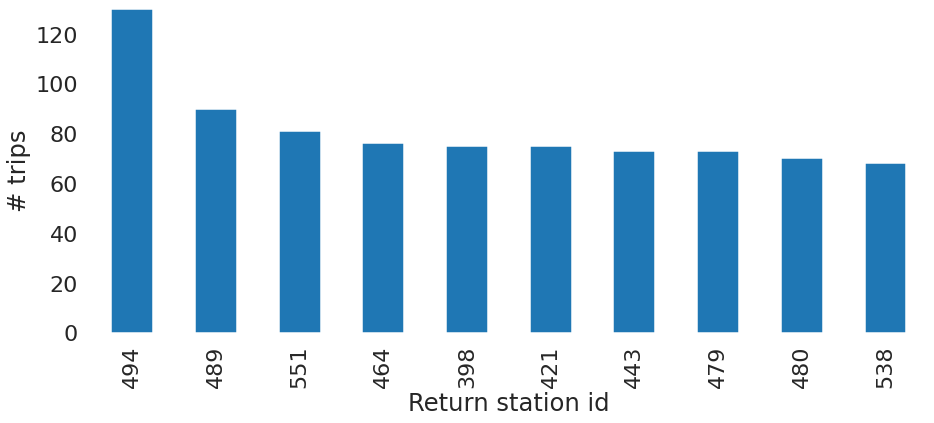

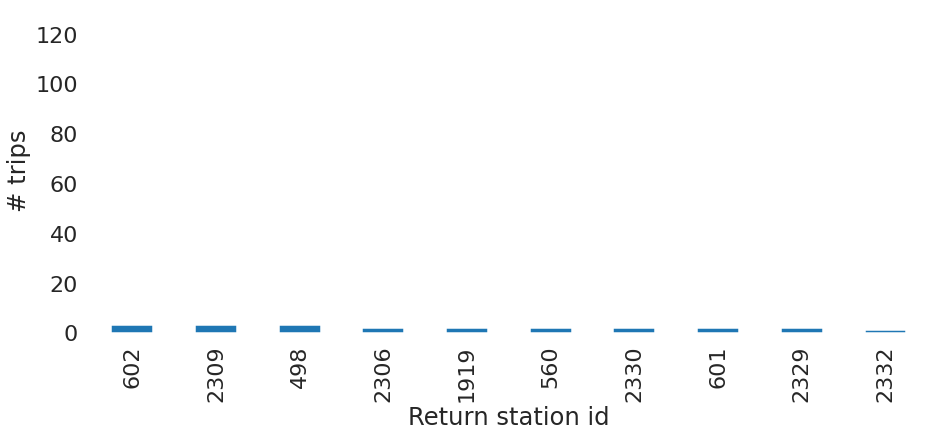

In [30]:
ax=end_top_stations.plot(x="end_station_id", y='Avg_no_trips_end' , kind="bar", figsize=(15, 6), legend=False)
ax.set_xlabel("Return station id")
ax.set_ylabel("# trips")
ax.set_ylim(0,131)
#ax.yaxis.set_major_formatter(millions)
ax.set(frame_on=False)
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/retu_avg_top_10_no_trips.eps')

ax=end_botom_station.plot(x="end_station_id", y=["Avg_no_trips_end"], kind="bar", figsize=(15, 6),legend=False )
ax.set_xlabel("Return station id")
ax.set_ylabel("# trips")
ax.set_ylim(0,131)
#ax.yaxis.set_major_formatter(millions)
ax.set_frame_on(False)
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/retu_avg_bottom_10_no_trips.eps')


In [31]:
# Pair of top initiated and returned stations
top_in_out = pd.concat([top_stations, end_top_stations], axis=1, ignore_index=False).reset_index()
#top_in_out.start_station_id.fillna(top_in_out.end_station_id, inplace=True)

#avg_mised_value = station[station[start_station_id] == 

for col in ['start_station_id', 'end_station_id']:
    if col == 'start_station_id':
        index = top_in_out['start_station_id'].index[top_in_out['start_station_id'].apply(np.isnan)]
        df_index = top_in_out.index.values.tolist()
        ind = [df_index.index(i) for i in set(index)]
        
        new_station_id = top_in_out.loc[ind, 'end_station_id']
        top_in_out.loc[ind, 'start_station_id'] = new_station_id
        
        extract_station = station[station['start_station_id'] == int(new_station_id)]
        extracted_value = extract_station['Avg_no_trips'].values
        
        top_in_out.loc[ind, 'Avg_no_trips'] =  extracted_value
    else:
        index = top_in_out['end_station_id'].index[top_in_out['end_station_id'].apply(np.isnan)]
        
        df_index = top_in_out.index.values.tolist()
        ind = [df_index.index(i) for i in set(index)]
        
        new_station_id = top_in_out.loc[ind, 'start_station_id']
        top_in_out.loc[ind, 'end_station_id'] = new_station_id
        
        extract_station = end_station[end_station['end_station_id'] == int(new_station_id)]
        extracted_value = extract_station['Avg_no_trips_end'].values
        
        top_in_out.loc[ind, 'Avg_no_trips_end'] =  extracted_value
        
         
top_in_out['diff'] = abs(top_in_out.Avg_no_trips - top_in_out.Avg_no_trips_end)
top_in_out['start_station_id']  = top_in_out['start_station_id'].astype(int)     
#Pair of top initiated and returned stations
botom_in_out = pd.concat([botom_station, end_botom_station], axis=1, ignore_index=False).reset_index()



#botom_in_out.start_station_id.fillna(botom_in_out.end_station_id, inplace=True)
#botom_in_out.start_station_id = botom_in_out.start_station_id.astype(int)


for col in ['start_station_id', 'end_station_id']:
    if col == 'start_station_id':
        index = botom_in_out['start_station_id'].index[botom_in_out['start_station_id'].apply(np.isnan)]
        df_index = botom_in_out.index.values.tolist()
        ind = [df_index.index(i) for i in set(index)]
        new_station_id = botom_in_out.loc[ind, 'end_station_id']
        botom_in_out.loc[ind, 'start_station_id'] = new_station_id
        
        extract_station = station[station['start_station_id'].isin(new_station_id)]
        extracted_value = extract_station['Avg_no_trips'].values
        
        botom_in_out.loc[ind, 'Avg_no_trips'] =  extracted_value
    else:
        index = botom_in_out['end_station_id'].index[botom_in_out['end_station_id'].apply(np.isnan)]
        
        df_index = botom_in_out.index.values.tolist()
        ind = [df_index.index(i) for i in set(index)]
        
        new_station_id = botom_in_out.loc[ind, 'start_station_id']
        botom_in_out.loc[ind, 'end_station_id'] = new_station_id
        
        extract_station = end_station[end_station['end_station_id'].isin(new_station_id)]
        extracted_value = extract_station['Avg_no_trips_end'].values
        
        botom_in_out.loc[ind, 'Avg_no_trips_end'] =  extracted_value
        pass

#top_in_out.start_station_id.astype('int')
botom_in_out = botom_in_out.astype(int)
botom_in_out.rename(columns={'Avg_no_trips':'Avg num trips initiated', 'Avg_no_trips_end': 'Avg num trips ended'}, inplace=True)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


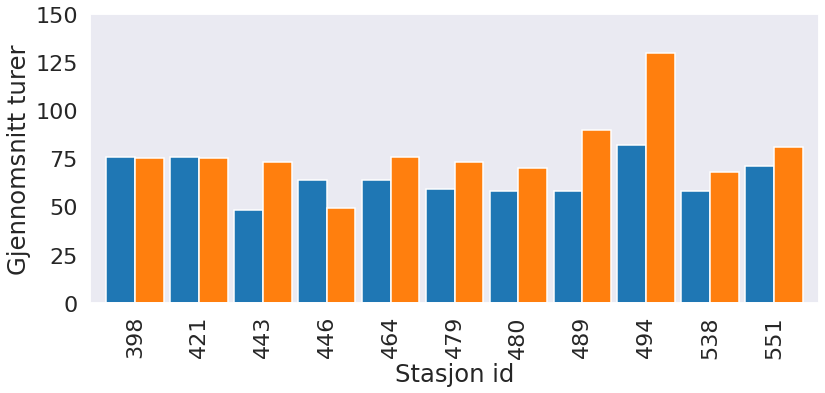

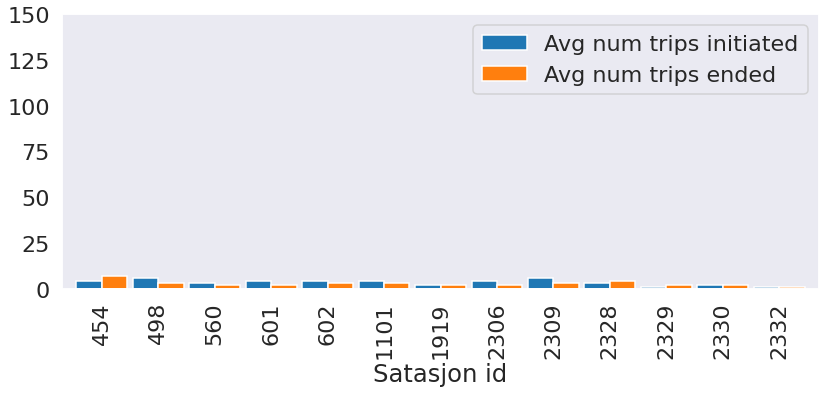

In [32]:
# Visialization 
#top_in_out.start_station_id = int(top_in_out.start_station_id)
ax=top_in_out.plot(x="start_station_id", y=["Avg_no_trips", "Avg_no_trips_end"], kind="bar", width = 0.9, figsize=(12, 6), legend=False)
ax.set_xlabel("Stasjon id")
ax.set_ylabel("Gjennomsnitt turer")
ax.set_ylim(0,150)
#ax.yaxis.set_major_formatter(millions)
ax.set(frame_on = True)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/top_10_pairs_avg_no_trips_.eps')


botom_in_out.rename(columns={'Avg_no_trips':'Avg num trips initiated', 'Avg_no_trips_end': 'Avg num trips ended'}, inplace=True)
ax=botom_in_out.plot(x="start_station_id", y=["Avg num trips initiated", "Avg num trips ended"], kind="bar", width = 0.9, figsize=(12, 6), legend=(['Abay', 'Kassa']))
ax.set_xlabel("Satasjon id")
#ax.set_ylabel("# trips")
ax.set_ylim(0,150)
#ax.yaxis.set_major_formatter(millions)
ax.set_frame_on(True)
plt.tight_layout()
plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/bottom_10_pairs_avg_no_trips.eps')

In [16]:
import json
data = []
with open('station_status.json', errors='ignore') as f:
    for line in f:
        data.append(json.loads(line))
print(data[0])



{'last_updated': 1649709677, 'ttl': 10, 'version': '2.2', 'data': {'stations': [{'station_id': '2334', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '2333', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '2332', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '2330', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 7}, {'station_id': '2329', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '2328', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bike

In [13]:
data = [{'station_id': '2332', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '2330', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 14}, {'station_id': '2329', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '2328', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '2315', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 14}, {'station_id': '2309', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '2308', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '2307', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '2306', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '2305', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '2304', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '2280', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 12}, {'station_id': '2270', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 19}, {'station_id': '1919', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 6}, {'station_id': '1755', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 32}, {'station_id': '1101', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 23}, {'station_id': '1023', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 14}, {'station_id': '1009', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 10}, {'station_id': '970', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 23}, {'station_id': '787', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '627', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 27}, {'station_id': '623', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 19}, {'station_id': '624', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '626', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 22}, {'station_id': '614', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '616', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '618', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 42}, {'station_id': '621', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '622', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '613', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '620', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 40}, {'station_id': '596', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '617', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '609', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 26}, {'station_id': '607', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '603', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '590', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 38}, {'station_id': '610', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 19}, {'station_id': '608', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '593', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '530', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 10}, {'station_id': '463', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '475', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 20}, {'station_id': '439', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 25}, {'station_id': '600', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '440', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '612', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '491', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 6, 'num_docks_available': 12}, {'station_id': '493', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '410', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '605', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '388', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '591', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 23}, {'station_id': '592', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 16}, {'station_id': '585', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '565', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '568', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 14}, {'station_id': '588', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '584', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 35}, {'station_id': '569', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '577', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '606', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '564', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '570', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '572', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 40}, {'station_id': '587', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '586', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '576', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 16}, {'station_id': '602', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '575', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '567', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 39}, {'station_id': '582', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '595', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '557', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 18}, {'station_id': '542', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '563', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '558', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '552', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '555', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '573', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 19}, {'station_id': '561', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '615', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 19}, {'station_id': '543', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 19}, {'station_id': '554', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '574', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '560', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 9}, {'station_id': '548', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '559', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 16}, {'station_id': '545', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 38}, {'station_id': '550', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 9}, {'station_id': '541', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 9}, {'station_id': '527', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 7}, {'station_id': '529', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 18}, {'station_id': '553', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 22}, {'station_id': '549', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 5, 'num_docks_available': 15}, {'station_id': '526', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 4, 'num_docks_available': 11}, {'station_id': '537', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 16}, {'station_id': '547', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '601', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '533', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '535', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 26}, {'station_id': '524', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 20}, {'station_id': '519', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '534', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 38}, {'station_id': '521', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 12}, {'station_id': '518', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '556', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '525', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '523', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 28}, {'station_id': '522', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 10}, {'station_id': '594', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '532', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 19}, {'station_id': '509', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '531', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '536', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '562', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 40}, {'station_id': '508', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '511', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '505', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '501', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 16}, {'station_id': '514', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '500', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '503', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 33}, {'station_id': '498', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '507', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '512', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '502', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 35}, {'station_id': '619', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 42}, {'station_id': '474', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 42}, {'station_id': '580', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 44}, {'station_id': '496', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 45}, {'station_id': '482', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '407', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 12}, {'station_id': '409', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 24}, {'station_id': '451', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '385', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '402', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '516', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '625', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 6, 'num_docks_available': 36}, {'station_id': '429', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 20}, {'station_id': '380', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '583', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '398', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 17}, {'station_id': '381', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '464', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 32}, {'station_id': '442', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '483', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '458', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '499', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 17}, {'station_id': '472', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 22}, {'station_id': '506', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '465', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 29}, {'station_id': '611', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 4, 'num_docks_available': 35}, {'station_id': '404', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '579', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '434', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '462', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '578', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '415', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 11}, {'station_id': '423', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '412', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 9}, {'station_id': '387', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 4, 'num_docks_available': 11}, {'station_id': '405', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 4, 'num_docks_available': 14}, {'station_id': '441', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '443', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 44}, {'station_id': '454', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 22}, {'station_id': '436', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '394', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '497', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 27}, {'station_id': '581', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 22}, {'station_id': '461', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '599', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 42}, {'station_id': '428', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 23}, {'station_id': '400', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 23}, {'station_id': '487', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '438', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 42}, {'station_id': '459', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '433', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 18}, {'station_id': '399', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 35}, {'station_id': '489', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 29}, {'station_id': '742', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '551', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 34}, {'station_id': '406', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '488', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '540', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 36}, {'station_id': '431', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '393', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '420', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '397', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 42}, {'station_id': '390', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '430', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 6, 'num_docks_available': 36}, {'station_id': '484', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 32}, {'station_id': '479', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 4, 'num_docks_available': 26}, {'station_id': '403', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '435', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '426', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '450', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '456', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 35}, {'station_id': '468', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '453', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 34}, {'station_id': '466', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '469', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '416', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '391', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '389', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '470', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 14}, {'station_id': '384', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '425', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 7}, {'station_id': '411', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '598', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 33}, {'station_id': '444', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 19}, {'station_id': '447', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '408', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '737', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 22}, {'station_id': '432', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '401', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 4}, {'station_id': '452', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 27}, {'station_id': '392', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 49}, {'station_id': '481', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 39}, {'station_id': '495', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 40}, {'station_id': '478', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 11}, {'station_id': '448', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 7}, {'station_id': '414', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '476', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 18}, {'station_id': '445', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '748', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 30}, {'station_id': '473', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 9}, {'station_id': '383', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '480', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 3, 'num_docks_available': 19}, {'station_id': '421', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 22}, {'station_id': '746', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '378', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '417', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '427', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '418', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '413', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 17}, {'station_id': '486', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '471', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '597', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 13}, {'station_id': '739', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 18}, {'station_id': '382', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 9}, {'station_id': '396', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 2, 'num_docks_available': 21}, {'station_id': '735', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '437', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 23}, {'station_id': '446', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '424', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 10}, {'station_id': '455', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '457', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 10}, {'station_id': '377', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 29}, {'station_id': '738', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '460', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 27}, {'station_id': '744', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 0, 'num_docks_available': 10}, {'station_id': '485', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1647430291, 'num_bikes_available': 1, 'num_docks_available': 20}]


In [18]:
data = [{'station_id': '2334', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '2333', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '2332', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '2330', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 7}, {'station_id': '2329', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '2328', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 14}, {'station_id': '2315', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 15}, {'station_id': '2309', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 20, 'num_docks_available': 10}, {'station_id': '2308', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 0}, {'station_id': '2307', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 20, 'num_docks_available': 10}, {'station_id': '2306', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 13}, {'station_id': '2305', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 12}, {'station_id': '2304', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 12}, {'station_id': '2280', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 15}, {'station_id': '2270', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 9}, {'station_id': '1919', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 6}, {'station_id': '1755', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 28}, {'station_id': '1101', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 22}, {'station_id': '1023', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 13}, {'station_id': '1009', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 5}, {'station_id': '970', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 24}, {'station_id': '787', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 12}, {'station_id': '627', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 28}, {'station_id': '624', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 11}, {'station_id': '626', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 23}, {'station_id': '614', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 12}, {'station_id': '616', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 9}, {'station_id': '618', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 21, 'num_docks_available': 21}, {'station_id': '621', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 20, 'num_docks_available': 7}, {'station_id': '622', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 17}, {'station_id': '613', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 12}, {'station_id': '620', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 26}, {'station_id': '596', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 7}, {'station_id': '617', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '609', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 25}, {'station_id': '607', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 19, 'num_docks_available': 11}, {'station_id': '603', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 12}, {'station_id': '590', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 22, 'num_docks_available': 18}, {'station_id': '610', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 14}, {'station_id': '608', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 14}, {'station_id': '593', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 22, 'num_docks_available': 7}, {'station_id': '530', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 3}, {'station_id': '463', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 13}, {'station_id': '475', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 18}, {'station_id': '439', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 20, 'num_docks_available': 5}, {'station_id': '600', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '440', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 9}, {'station_id': '612', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 17}, {'station_id': '491', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '493', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 21}, {'station_id': '410', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 16, 'num_docks_available': 11}, {'station_id': '605', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '388', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 4}, {'station_id': '591', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 17}, {'station_id': '592', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 6}, {'station_id': '585', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 5}, {'station_id': '565', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 11}, {'station_id': '571', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 14}, {'station_id': '568', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 5}, {'station_id': '588', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '584', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 35}, {'station_id': '569', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 26}, {'station_id': '577', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 28}, {'station_id': '606', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '564', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 18}, {'station_id': '570', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 3}, {'station_id': '572', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 28}, {'station_id': '587', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 11}, {'station_id': '586', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 12}, {'station_id': '576', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 16}, {'station_id': '602', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 8}, {'station_id': '575', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 16}, {'station_id': '567', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 27}, {'station_id': '582', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 26, 'num_docks_available': 4}, {'station_id': '595', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 18}, {'station_id': '557', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '542', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 10}, {'station_id': '563', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 8}, {'station_id': '558', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 14}, {'station_id': '552', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 17}, {'station_id': '555', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '573', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 16}, {'station_id': '561', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 17}, {'station_id': '615', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 16}, {'station_id': '543', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 7}, {'station_id': '554', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 8}, {'station_id': '574', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 1}, {'station_id': '560', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 3}, {'station_id': '548', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 7}, {'station_id': '545', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 35}, {'station_id': '550', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 7}, {'station_id': '541', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '527', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 1}, {'station_id': '529', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 8}, {'station_id': '553', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 19}, {'station_id': '549', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 21}, {'station_id': '526', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 11}, {'station_id': '537', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 13}, {'station_id': '547', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 22}, {'station_id': '601', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 5}, {'station_id': '533', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '535', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 26}, {'station_id': '524', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 11}, {'station_id': '519', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 23, 'num_docks_available': 1}, {'station_id': '534', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 36}, {'station_id': '521', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 7}, {'station_id': '518', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 13}, {'station_id': '556', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 15}, {'station_id': '525', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 13}, {'station_id': '523', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '522', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 2}, {'station_id': '594', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 18, 'num_docks_available': 3}, {'station_id': '532', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 8}, {'station_id': '509', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 7}, {'station_id': '531', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 11}, {'station_id': '536', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 5}, {'station_id': '562', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 17, 'num_docks_available': 23}, {'station_id': '508', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 7}, {'station_id': '511', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 24}, {'station_id': '505', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 19, 'num_docks_available': 5}, {'station_id': '501', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 16}, {'station_id': '514', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 3}, {'station_id': '500', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 8}, {'station_id': '503', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 21, 'num_docks_available': 12}, {'station_id': '498', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 8}, {'station_id': '507', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 7}, {'station_id': '512', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 24}, {'station_id': '502', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 19}, {'station_id': '619', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 17, 'num_docks_available': 25}, {'station_id': '474', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 27}, {'station_id': '580', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 37}, {'station_id': '496', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 17, 'num_docks_available': 28}, {'station_id': '482', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 14}, {'station_id': '407', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 8}, {'station_id': '409', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 11}, {'station_id': '451', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 7}, {'station_id': '385', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 6}, {'station_id': '402', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 11}, {'station_id': '516', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 9}, {'station_id': '625', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 40}, {'station_id': '429', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 20}, {'station_id': '380', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 20}, {'station_id': '583', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 13}, {'station_id': '398', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 16, 'num_docks_available': 2}, {'station_id': '381', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 8}, {'station_id': '464', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 26}, {'station_id': '442', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 11}, {'station_id': '483', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 16}, {'station_id': '458', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 1}, {'station_id': '499', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 19}, {'station_id': '472', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 23}, {'station_id': '506', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 24}, {'station_id': '465', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 29}, {'station_id': '611', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 38}, {'station_id': '404', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 15}, {'station_id': '579', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 13}, {'station_id': '434', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 17}, {'station_id': '462', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 14}, {'station_id': '578', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 18, 'num_docks_available': 6}, {'station_id': '415', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 7}, {'station_id': '423', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 14}, {'station_id': '412', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 0}, {'station_id': '387', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 12}, {'station_id': '405', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 7}, {'station_id': '441', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 12}, {'station_id': '443', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 41}, {'station_id': '454', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 10}, {'station_id': '436', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 4}, {'station_id': '394', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 10, 'num_docks_available': 11}, {'station_id': '497', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 20}, {'station_id': '581', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 9}, {'station_id': '461', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 19}, {'station_id': '599', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 35}, {'station_id': '428', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 12}, {'station_id': '400', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 20}, {'station_id': '487', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 17}, {'station_id': '438', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 22, 'num_docks_available': 20}, {'station_id': '459', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 4}, {'station_id': '433', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 13}, {'station_id': '399', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 17, 'num_docks_available': 18}, {'station_id': '489', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 28}, {'station_id': '742', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 19}, {'station_id': '551', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 18, 'num_docks_available': 17}, {'station_id': '406', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '488', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 17}, {'station_id': '540', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 16, 'num_docks_available': 20}, {'station_id': '431', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 12, 'num_docks_available': 8}, {'station_id': '393', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 20, 'num_docks_available': 0}, {'station_id': '420', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 12}, {'station_id': '397', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 16, 'num_docks_available': 25}, {'station_id': '390', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 24}, {'station_id': '430', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 34}, {'station_id': '484', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 31}, {'station_id': '479', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 27}, {'station_id': '403', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 6}, {'station_id': '435', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 13, 'num_docks_available': 17}, {'station_id': '426', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 10}, {'station_id': '450', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 13}, {'station_id': '456', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 28}, {'station_id': '468', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 6}, {'station_id': '453', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 19, 'num_docks_available': 17}, {'station_id': '466', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 4}, {'station_id': '469', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 24}, {'station_id': '416', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 4}, {'station_id': '391', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 9}, {'station_id': '389', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 14}, {'station_id': '470', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 14, 'num_docks_available': 1}, {'station_id': '384', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 13}, {'station_id': '425', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 8}, {'station_id': '411', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 13}, {'station_id': '598', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 18}, {'station_id': '444', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 11}, {'station_id': '447', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 21}, {'station_id': '408', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 9}, {'station_id': '737', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 20}, {'station_id': '432', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '401', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 1}, {'station_id': '452', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 26}, {'station_id': '392', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 47}, {'station_id': '481', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 39}, {'station_id': '495', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 35}, {'station_id': '478', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 9}, {'station_id': '448', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 9}, {'station_id': '414', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 10}, {'station_id': '476', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 12}, {'station_id': '445', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 12}, {'station_id': '748', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 27}, {'station_id': '473', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 2}, {'station_id': '383', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 18, 'num_docks_available': 12}, {'station_id': '480', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 11, 'num_docks_available': 13}, {'station_id': '421', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 0, 'num_docks_available': 25}, {'station_id': '746', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '378', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 5}, {'station_id': '417', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 12}, {'station_id': '427', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 9}, {'station_id': '418', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 9}, {'station_id': '413', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 8, 'num_docks_available': 10}, {'station_id': '486', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 20}, {'station_id': '471', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 1, 'num_docks_available': 11}, {'station_id': '597', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 11}, {'station_id': '739', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 18}, {'station_id': '382', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 2}, {'station_id': '396', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 5, 'num_docks_available': 19}, {'station_id': '735', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 9}, {'station_id': '437', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 20}, {'station_id': '446', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 15, 'num_docks_available': 8}, {'station_id': '424', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 6, 'num_docks_available': 4}, {'station_id': '455', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 3, 'num_docks_available': 9}, {'station_id': '457', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 8}, {'station_id': '377', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 9, 'num_docks_available': 20}, {'station_id': '738', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 5}, {'station_id': '460', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 7, 'num_docks_available': 22}, {'station_id': '744', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 4, 'num_docks_available': 6}, {'station_id': '485', 'is_installed': 1, 'is_renting': 1, 'is_returning': 1, 'last_reported': 1649709677, 'num_bikes_available': 2, 'num_docks_available': 19}]

In [19]:
import pandas as pd
djson = pd.json_normalize(data)
djson.to_csv('station_status.csv')
capa_df = pd.read_csv('station_status.csv')
capa_df


,Unnamed: 0,station_id,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_docks_available
0,0,2334,1,1,1,1649709677,2,10
1,1,2333,1,1,1,1649709677,2,13
2,2,2332,1,1,1,1649709677,1,11
3,3,2330,1,1,1,1649709677,8,7
4,4,2329,1,1,1,1649709677,0,15
...,...,...,...,...,...,...,...,...
249,249,377,1,1,1,1649709677,9,20
250,250,738,1,1,1,1649709677,7,5
251,251,460,1,1,1,1649709677,7,22
252,252,744,1,1,1,1649709677,4,6


In [6]:
top_station_id = top_in_out.start_station_id
capa_df = pd.read_csv('station_status.csv')

up_capa_df = capa_df[['station_id', 'num_docks_available']]
up_capa_df = pd.merge(up_capa_df, top_in_out, left_on='station_id', right_on='start_station_id', how='inner')
#up_capa_df['new_capacity'] = up_capa_df.num_docks_available.astype('int')  + up_capa_df.diff.astype('int')
num_docks_available = up_capa_df['num_docks_available']
diff = up_capa_df['diff']
new_capacity = num_docks_available + diff

up_capa_df['new_capacity']= new_capacity
up_capa_df.rename(columns={'num_docks_available':'Nåværende kapasitet', 'new_capacity': 'Ny kapasitet'}, inplace=True)
up_capa_df

NameError: name 'top_in_out' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


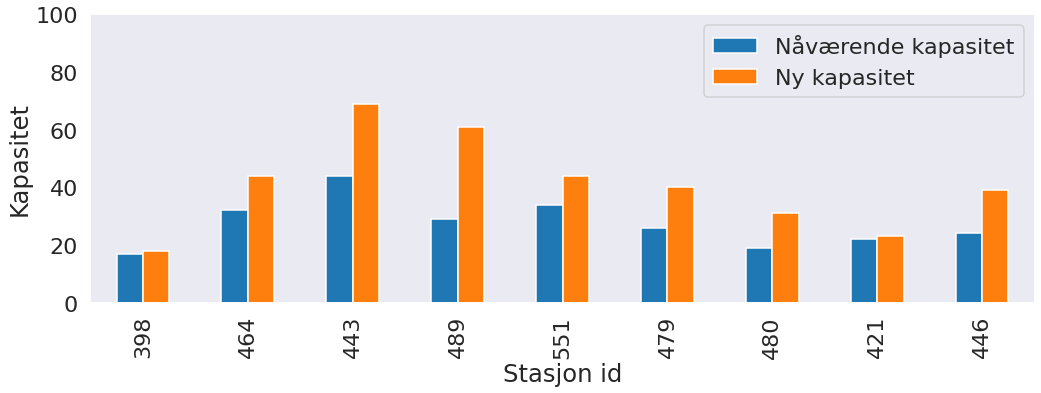

In [37]:
sns.set_context('talk', font_scale=1.35)
ax=up_capa_df.plot(x="station_id", y=["Nåværende kapasitet", "Ny kapasitet"], kind="bar", figsize=(15, 6), legend=True)
ax.set_xlabel("Stasjon id")
ax.set_ylabel("Kapasitet")
ax.set_ylim(0,100)
#ax.yaxis.set_major_formatter(millions)
ax.set(frame_on=True)
plt.tight_layout()

plt.savefig('/home/abay/Desktop/DataScienceTutor/sykk/images/new_capacity_for_top_10_stations.eps')

In [38]:
capa_df[capa_df['station_id'] == 503]

,Unnamed: 0,station_id,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_docks_available
122,122,503,1,1,1,1647430291,0,33


In [55]:
#capa_df.sort_values('num_bikes_available', ascending = False)
numofbikes_in_out = pd.merge(station, end_station, left_on='start_station_id', right_on='end_station_id', how='inner')

move_bikes = pd.merge(capa_df, numofbikes_in_out, left_on='station_id', right_on='start_station_id', how='inner')
move_bikes = move_bikes[['station_id', 'num_docks_available', 'num_bikes_available', 'Avg_no_trips', 'Avg_no_trips_end']]

#positive_ind = (move_bikes.Avg_no_trips_end - move_bikes.Avg_no_trips) > 0

move_bikes['num_bikes_available'] = move_bikes['num_bikes_available'] + abs(move_bikes['Avg_no_trips_end'] - move_bikes['Avg_no_trips'])
#num_dock_less_num_bikes = move_bikes['num_docks_available'] < move_bikes['num_bikes_available']
#move_bikes['num_docks_available'] = move_bikes['num_bikes_available'] + move_bikes['num_docks_available']


move_bikes.loc[num_dock_less_num_bikes, 'num_bikes_available'] = move_bikes.loc[num_dock_less_num_bikes, 'num_docks_available']-3


index_to = (move_bikes.Avg_no_trips - move_bikes.Avg_no_trips_end) >= move_bikes.num_docks_available*0.1
index_from = move_bikes.num_bikes_available >= move_bikes.num_docks_available*0.75

 
move_bikes_to = move_bikes.loc[index_to, :]
# topten_move_to = move_bikes_to.head(10)

move_bikes_from = move_bikes.loc[index_from, :]
move_bikes_from.sort_values('num_docks_available', ascending=False).reset_index()
# topten_move_from = move_bikes_from.iloc[0:20, :]

move_bikes

,station_id,num_docks_available,num_bikes_available,Avg_no_trips,Avg_no_trips_end
0,2332,12,0,1,1
1,2330,14,0,2,2
2,2329,15,1,1,2
3,2328,18,0,3,3
4,2315,14,4,16,17
...,...,...,...,...,...
248,377,29,2,18,16
249,738,12,0,9,9
250,460,27,1,44,44
251,744,10,2,23,21


In [56]:
list_bikes_from   = move_bikes_from.num_bikes_available.to_list()
list_dock_from    = move_bikes_from.num_docks_available.to_list()
list_station_from = move_bikes_from.station_id.to_list()

list_bikes_to   = move_bikes_to.num_bikes_available.to_list()
list_dock_to    = move_bikes_to.num_docks_available.to_list()
list_station_to = move_bikes_to.station_id.to_list()

for j in range(0, len(list_bikes_to)):
    if list_bikes_to[j] < list_dock_to[j]*0.75:
        #print('True')
        for i in range(0, len(list_bikes_from)):
            #print('Yes')
            if list_bikes_from[i] > list_dock_from[i]*0.75:
                #print('Indeed')
                moved_amount = list_bikes_from[i]*0.2 # 30% of the bikes
                list_bikes_to[j] = list_bikes_to[j] + moved_amount
                #print(list_bikes_to[j])
                
                list_bikes_from[i] = list_bikes_from[i] - moved_amount
                if list_bikes_to[j] > list_dock_to[j]:
                    #print('yes it is above ')
                    extra_amount = (list_bikes_to[j]-list_dock_to[j])
                    list_bikes_to[j] = list_bikes_to[j] - extra_amount
                    
                    list_bikes_from[i] = list_bikes_from[i] + extra_amount
                    moved_amount = moved_amount - extra_amount
                    #print(moved_amount)
                    #print(list_bikes_to[j])

                    #break
            #else:
                #continue
                #print('MOve', round(moved_amount), 'to')
                if moved_amount >= 1:
                    print('Flytte {}  sykler fra stasjon {}  til stasjon {}'.format(round(moved_amount), list_station_from[i], list_station_to[j])  )
            
        
        


Flytte 2  sykler fra stasjon 491  til stasjon 2307
Flytte 4  sykler fra stasjon 557  til stasjon 2307
Flytte 5  sykler fra stasjon 523  til stasjon 2307
Flytte 5  sykler fra stasjon 465  til stasjon 2307
Flytte 7  sykler fra stasjon 611  til stasjon 2307
Flytte 3  sykler fra stasjon 489  til stasjon 2307
Flytte 3  sykler fra stasjon 557  til stasjon 2306
Flytte 4  sykler fra stasjon 523  til stasjon 2306
Flytte 6  sykler fra stasjon 611  til stasjon 2306
Flytte 3  sykler fra stasjon 489  til stasjon 2306
Flytte 7  sykler fra stasjon 430  til stasjon 2304
Flytte 3  sykler fra stasjon 391  til stasjon 2304
Flytte 3  sykler fra stasjon 495  til stasjon 2304
Flytte 3  sykler fra stasjon 480  til stasjon 2270
Flytte 4  sykler fra stasjon 396  til stasjon 2270
Flytte 4  sykler fra stasjon 437  til stasjon 2270


In [ ]:
move_bikes_from

In [ ]:
move_bikes_to

In [ ]:
# For presentation 
move_bikes_to['%'] = round(100*move_bikes_to.num_bikes_available/move_bikes_to.num_docks_available, 1)
(move_bikes_to[['station_id', 'num_docks_available', 'num_bikes_available', '%']]).head(10)

In [24]:
w_df['date'] = pd.to_datetime(w_df['date'], format='%Y-%m-%d %h:%m')
w_df.head()

,T2M,T2MWET,specific_humidity,precipitation,WS10M,date
2089,-5.21,-6.09,2.26,0.0,1.92,2019-04-01 01:00:00
2090,-5.42,-6.34,2.20,0.0,1.80,2019-04-01 02:00:00
2091,-5.58,-6.51,2.14,0.0,1.69,2019-04-01 03:00:00
2092,-5.68,-6.63,2.14,0.0,1.61,2019-04-01 04:00:00
2093,-5.66,-6.67,2.08,0.0,1.65,2019-04-01 05:00:00


In [ ]:
df_

In [36]:
# Prediction per hours 

merged = pd.merge(df, w_df, on = 'year_hour', how = 'inner')
merged = merged[['duration', 'start_station_id', 'end_station_id', 'year_hour', 'T2M', 'precipitation', 'WS10M']]

In [37]:
# average temp
start_station = merged.groupby(['start_station_id', 'year_hour']).agg({'duration':'count', 'T2M':'mean', 'precipitation':'mean', 'WS10M':'mean'})
start_station.to_csv('start_station_data.csv')

end_station = merged.groupby(['end_station_id', 'year_hour']).agg({'duration':'count', 'T2M':'mean', 'precipitation':'mean', 'WS10M':'mean'})
end_station.to_csv('end_station_data.csv')